In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
df = pd.read_csv("item_orders.csv")

/home/joaolrossi/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,order_id,date,item_code,unit_price_vat_excl,quantity,unit_cogs,unit_rrp_vat_excl,department,item_name,name,group0,group1,group2
0,2000093387,2020-04-24 00:00:00,S101,3.506048,1,0.0,3.496395,E-COMMER,Dopravné,- žádný výrobce -,Other,NaN,NaN
1,2000093391,2020-04-24 00:00:00,S101,3.737403,1,0.0,3.737403,E-COMMER,Dopravné,- žádný výrobce -,Other,NaN,NaN
2,2000093394,2020-04-24 00:00:00,S101,3.171318,1,0.0,3.178294,E-COMMER,Dopravné,- žádný výrobce -,Other,NaN,NaN
3,2000093395,2020-04-24 00:00:00,S101,2.850775,1,0.0,2.868217,E-COMMER,Dopravné,- žádný výrobce -,Other,NaN,NaN
4,2000093400,2020-04-24 00:00:00,S101,3.336224,1,0.0,3.307558,E-COMMER,Dopravné,- žádný výrobce -,Other,NaN,NaN


In [1]:
def get_time_series(df_in, filter_in, frequency = "Daily"):
    
    """
    Returns the time series dataframe for given filter, frequency,  and imput dataframe
    
    df_in = Pandas dataframe
    filter_in = filter that will be applied on df_in dataframe. Example: df_in.group1 == "Running shoes"
    frequency = Daily, Weekly or Monthly
    """
    
    df_temp = df_in[filter_in]
    if frequency == "Daily":
        df_temp['date']=pd.to_datetime(df_temp['date'], format = "%Y-%m-%d")
        df_out = df_temp.groupby("date").sum()
    
    if frequency == "Weekly":
        date=pd.to_datetime('2019-06-01')
        df_temp['date']=pd.to_datetime(df_temp['date'], format = "%Y-%m-%d")
        df_out = df_temp.resample('W-{:%a}'.format(date), on='date').sum()
        df_out = df_out.iloc[1: , :] # dropping the first row as it is an incomplete week
    
    if frequency == "Monthly":
        date=pd.to_datetime('2019-06-01')
        df_temp['date']=pd.to_datetime(df_temp['date'], format = "%Y-%m-%d")
        df_out = df_temp.resample('M'.format(date), on='date').sum()
    
    return(df_out["quantity"])


In [5]:
filter_in = df.group1 == "Running shoes"

### Sample Daily Data

In [6]:
daily_df = get_time_series(df, filter_in = filter_in, frequency = "Daily")

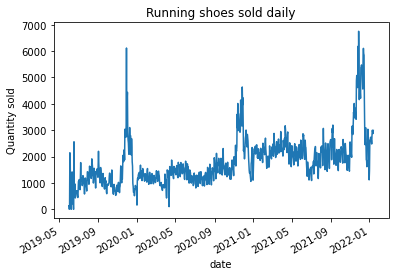

In [7]:
daily_df.plot(ylabel = "Quantity sold", title = "Running shoes sold daily");

In [8]:
daily_df.to_csv("Daily_running_shoes.csv")

### Sample Weekly Data

In [9]:
weekly_df = get_time_series(df, filter_in = filter_in, frequency = "Weekly")

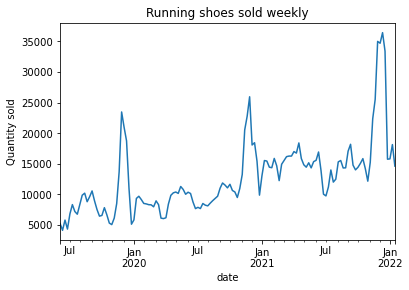

In [10]:
weekly_df.plot(ylabel = "Quantity sold", title = "Running shoes sold weekly");

In [11]:
weekly_df.to_csv("Weekly_running_shoes.csv")

### Sample Monthly Data

In [12]:
monthly_df = get_time_series(df, filter_in = filter_in, frequency = "Monthly")

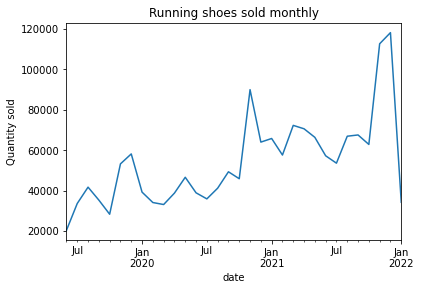

In [13]:
monthly_df.plot(ylabel = "Quantity sold", title = "Running shoes sold monthly");

In [14]:
monthly_df.to_csv("Monthly_running_shoes.csv")